In [1]:
#In this project, we will explore the correlations between different movie variables.

#First step is to import data from libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#read in data

df = pd.read_csv('/Users/cindychong/Desktop/movies.csv')


#look at data. Head means top of data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [2]:
#Next step is to check for any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [3]:
#data types for our columns (clean data)
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
#change date to year only
df['yearcorrect'] = df['released'].astype(str).str[-20:-15]

df['correct_year'] = df['released'].astype(str).str[-20:-15]

del df['yearcorrect'] #to delete a column

In [5]:
df.sort_values(by=['gross'],inplace=False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,"27,"
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020


In [6]:
pd.set_option('display.float_format', lambda x: '%.0f' % x) #changing from standard deviation to numbers
pd.options.display.float_format = '{:,}'.format # adding commas

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,"1,100,000.0",James Cameron,James Cameron,Sam Worthington,United States,"237,000,000.0","2,847,246,203.0",Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,"903,000.0",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"356,000,000.0","2,797,501,328.0",Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,"1,100,000.0",James Cameron,James Cameron,Leonardo DiCaprio,United States,"200,000,000.0","2,201,647,264.0",Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,"876,000.0",J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,"245,000,000.0","2,069,521,700.0",Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,"897,000.0",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"321,000,000.0","2,048,359,754.0",Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,"7,000.0",NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,"58,750.0",NaN,Embi Productions,NaN,"27,"
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,"15,000.0",NaN,NaN,120.0,2020


## pd.set_option('display.max_rows', None)

df

In [7]:
#remove duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
7657                                    NaN
Name: company, Length: 2386, dtype: object

In [22]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,533,5,0,2009,696,7.8,"1,100,000.0",1155,1778,2334,55,"237,000,000.0","2,847,246,203.0",2253,162.0,99
7445,535,5,0,2019,183,8.4,"903,000.0",162,743,2241,55,"356,000,000.0","2,797,501,328.0",1606,181.0,109
3045,6896,5,6,1997,704,7.8,"1,100,000.0",1155,1778,1595,55,"200,000,000.0","2,201,647,264.0",2253,194.0,85
6663,5144,5,0,2015,698,7.8,"876,000.0",1125,2550,524,55,"245,000,000.0","2,069,521,700.0",1540,138.0,105
7244,536,5,0,2018,192,8.4,"897,000.0",162,743,2241,55,"321,000,000.0","2,048,359,754.0",1606,149.0,108


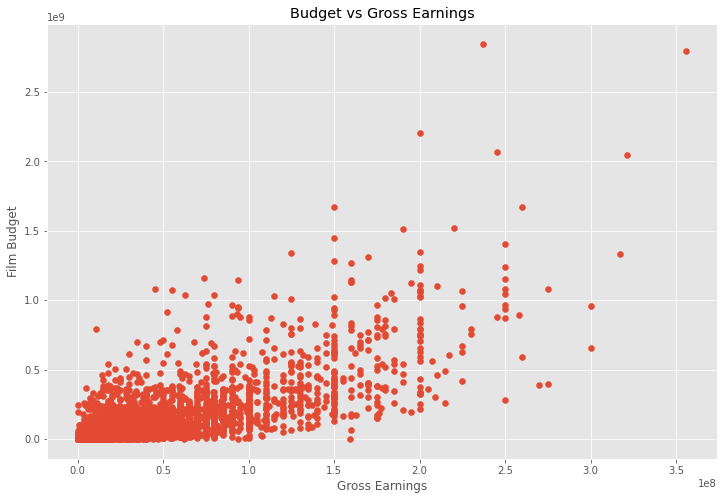

In [9]:
#scatter plot budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Film Budget')

plt.show()


In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,"1,100,000.0",James Cameron,James Cameron,Sam Worthington,United States,"237,000,000.0","2,847,246,203.0",Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,"903,000.0",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"356,000,000.0","2,797,501,328.0",Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,"1,100,000.0",James Cameron,James Cameron,Leonardo DiCaprio,United States,"200,000,000.0","2,201,647,264.0",Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,"876,000.0",J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,"245,000,000.0","2,069,521,700.0",Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,"897,000.0",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"321,000,000.0","2,048,359,754.0",Marvel Studios,149.0,2018


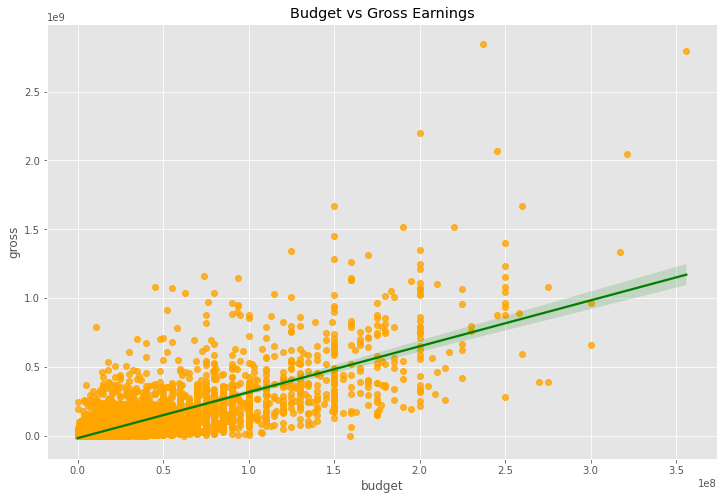

In [25]:
#regression plot using seaborn

sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color":"orange"}, line_kws={"color":"green"})
plt.title('Budget vs Gross Earnings')
plt.show()

In [12]:
#looking at correlations - only shows numerical values, no strings
df.corr(method ='pearson') #there are many types of methods, pearson is generic

,year,score,votes,budget,gross,runtime
year,1.0,0.09799495786262141,0.2229449274465139,0.32932109960028333,0.25748556615655227,0.12081082340759398
score,0.09799495786262141,1.0,0.40918219212828194,0.07625404432541426,0.18625781119363818,0.3994510823646328
votes,0.2229449274465139,0.40918219212828194,1.0,0.44242948355912876,0.6307565842742959,0.3092119920164506
budget,0.32932109960028333,0.07625404432541426,0.44242948355912876,1.0,0.7403948929894817,0.3204472893535718
gross,0.25748556615655227,0.18625781119363818,0.6307565842742959,0.7403948929894817,1.0,0.24521613203809164
runtime,0.12081082340759398,0.3994510823646328,0.3092119920164506,0.3204472893535718,0.24521613203809164,1.0


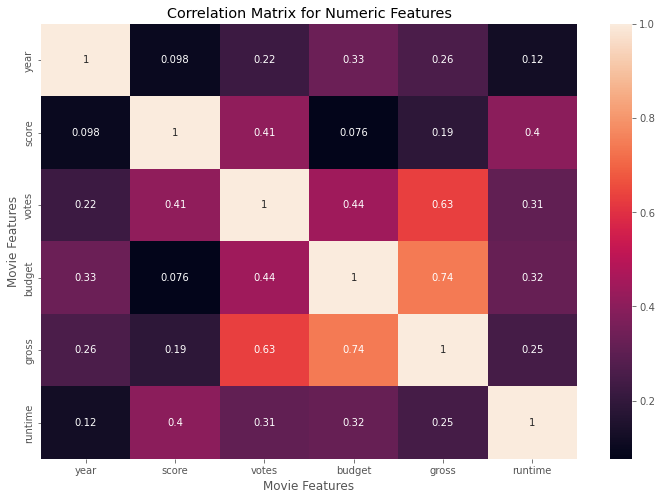

In [13]:
#visualise correlation matrix

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [14]:
#looking at data in 'company'. not numeric but we can convert from strings into numeric representations


In [15]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,533,5,0,2009,696,7.8,"1,100,000.0",1155,1778,2334,55,"237,000,000.0","2,847,246,203.0",2253,162.0,99
7445,535,5,0,2019,183,8.4,"903,000.0",162,743,2241,55,"356,000,000.0","2,797,501,328.0",1606,181.0,109
3045,6896,5,6,1997,704,7.8,"1,100,000.0",1155,1778,1595,55,"200,000,000.0","2,201,647,264.0",2253,194.0,85
6663,5144,5,0,2015,698,7.8,"876,000.0",1125,2550,524,55,"245,000,000.0","2,069,521,700.0",1540,138.0,105
7244,536,5,0,2018,192,8.4,"897,000.0",162,743,2241,55,"321,000,000.0","2,048,359,754.0",1606,149.0,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,"7,000.0",NaN,-1,90.0,110
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0,110
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,"58,750.0",NaN,941,NaN,17
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,"15,000.0",NaN,-1,120.0,110


In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,533,5,0,2009,696,7.8,"1,100,000.0",1155,1778,2334,55,"237,000,000.0","2,847,246,203.0",2253,162.0,99
7445,535,5,0,2019,183,8.4,"903,000.0",162,743,2241,55,"356,000,000.0","2,797,501,328.0",1606,181.0,109
3045,6896,5,6,1997,704,7.8,"1,100,000.0",1155,1778,1595,55,"200,000,000.0","2,201,647,264.0",2253,194.0,85
6663,5144,5,0,2015,698,7.8,"876,000.0",1125,2550,524,55,"245,000,000.0","2,069,521,700.0",1540,138.0,105
7244,536,5,0,2018,192,8.4,"897,000.0",162,743,2241,55,"321,000,000.0","2,048,359,754.0",1606,149.0,108


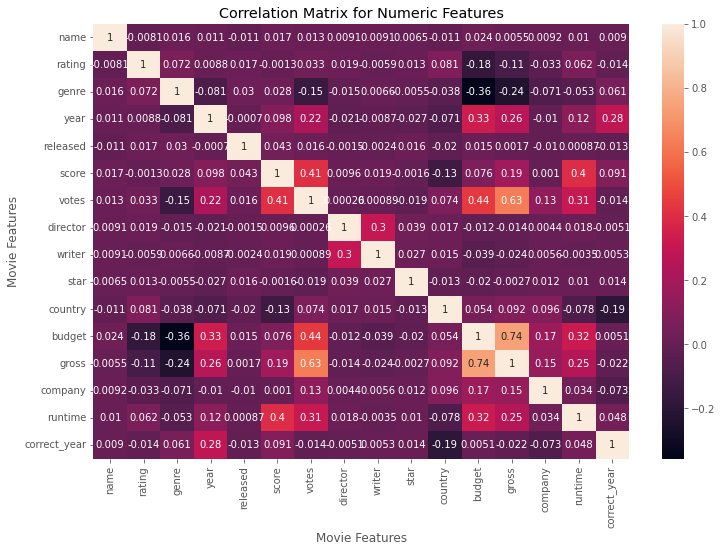

In [17]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [18]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name                             1.0
              rating         -0.008068623363832154
              genre            0.01635490010901649
              year            0.011452824170609185
              released       -0.011310714929528655
                                      ...         
correct_year  budget          0.005084320281867469
              gross          -0.022288692002766966
              company         -0.07263894477682376
              runtime         0.047710356026612485
              correct_year                     1.0
Length: 256, dtype: float64

In [19]:
#another way to sort correlation
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.35656448097761007
budget        genre          -0.35656448097761007
genre         gross           -0.2356502998930211
gross         genre           -0.2356502998930211
correct_year  country         -0.1939877764430826
                                     ...         
year          year                            1.0
genre         genre                           1.0
rating        rating                          1.0
runtime       runtime                         1.0
correct_year  correct_year                    1.0
Length: 256, dtype: float64

In [20]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr

votes         gross          0.6307565842742959
gross         votes          0.6307565842742959
budget        gross          0.7403948929894817
gross         budget         0.7403948929894817
name          name                          1.0
company       company                       1.0
gross         gross                         1.0
budget        budget                        1.0
country       country                       1.0
star          star                          1.0
writer        writer                        1.0
director      director                      1.0
votes         votes                         1.0
score         score                         1.0
released      released                      1.0
year          year                          1.0
genre         genre                         1.0
rating        rating                        1.0
runtime       runtime                       1.0
correct_year  correct_year                  1.0
dtype: float64

In [21]:
#a correlation is that votes and budgets had highest correlation to gross earnings
#company has low correlation